In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularPredictor
import pandas as pd

In [2]:
data = np.load(
    "/home2/hky/github/Gamma_Energy/AllSky_orginData/Data/test_cuted_data.npz"
)
data = {key: data[key] for key in data}

In [3]:
Predictor_log10energy = TabularPredictor.load(
    "/home2/hky/github/Gamma_Energy/AllSky_orginData/agmodel/log10Energy_orgindata/"
)
Predictor_deltatheta = TabularPredictor.load(
    "/home2/hky/github/Gamma_Energy/AllSky_orginData/agmodel/deltatheta/"
)
Predictor_deltaphi = TabularPredictor.load(
    "/home2/hky/github/Gamma_Energy/AllSky_orginData/agmodel/deltaphi/"
)

In [5]:
data_df = pd.DataFrame(data)

In [6]:
data_df["pred_log10energy"] = Predictor_log10energy.predict(data_df).to_numpy()

KeyboardInterrupt: 

: 

In [ ]:
data_df["pred_deltatheta"] = Predictor_deltatheta.predict(data_df).to_numpy()
data_df["pred_deltaphi"] = Predictor_deltaphi.predict(data_df).to_numpy()

In [ ]:
del data_df

In [ ]:
loc = np.loadtxt("/home2/hky/github/Gamma_Energy/AllSky_orginData/TibetIII-forplot.loc")

In [ ]:
x = list()
y = list()
for i in range(996):
    if np.max(data[f"Tibet_pf{i}"]) != 0:
        x.append(loc[i, 3])
        y.append(loc[i, 4])
x = np.array(x)
y = np.array(y)

In [ ]:
data["Matrix"] = np.zeros([len(data["nch"]), 32, 32])

In [ ]:
x_set = list(set(x))
x_set.sort()
y_set = list(set(y))
y_set.sort()

In [ ]:
x_dict = dict()
y_dict = dict()
for i in range(len(x_set)):
    x_dict[x_set[i]] = i + 1
    y_dict[y_set[i]] = i + 1

In [ ]:
for j in tqdm(range(len(data["nch"]))):
    for i in range(996):
        if loc[i, 3] in x_dict.keys() and loc[i, 4] in y_dict.keys():
            data["Matrix"][j, x_dict[loc[i, 3]], y_dict[loc[i, 4]]] = data[
                f"Tibet_pf{i}"
            ][j]

  0%|          | 0/1716156 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
train_index, test_index = train_test_split(
    range(len(data["nch"])), random_state=42, test_size=0.9
)
np.savez(
    "/home2/hky/github/Gamma_Energy/AllSky_orginData/Data/train_cuted_data_CNN.npz",
    **{key: data[key][train_index] for key in data.keys}
)
np.savez(
    "/home2/hky/github/Gamma_Energy/AllSky_orginData/Data/test_cuted_data_CNN.npz",
    **{key: data[key][test_index] for key in data.keys}
)

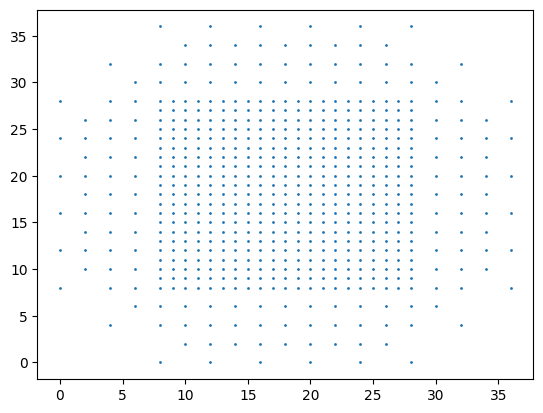

In [19]:
plt.scatter((x + 135) / 7.5, (y + 135) / 7.5, s=1)

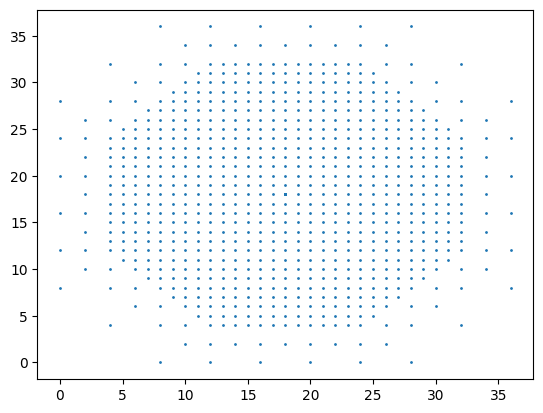

In [20]:
plt.scatter((loc[:, 3] + 135) / 7.5, (loc[:, 4] + 135) / 7.5, s=1)

In [12]:
for i in range(len(loc)):
    if loc[i][1] == 1:
        print(loc[i][0], (loc[i][3] + 135) / 7.5, (loc[i][4] + 135) / 7.5)

0.0 18.0 18.0
1.0 18.0 20.0
2.0 20.0 20.0
3.0 20.0 18.0
4.0 20.0 16.0
5.0 18.0 16.0
6.0 16.0 16.0
7.0 16.0 18.0
8.0 16.0 20.0
9.0 16.0 22.0
10.0 18.0 22.0
11.0 20.0 22.0
12.0 22.0 22.0
13.0 22.0 20.0
14.0 22.0 18.0
15.0 22.0 16.0
16.0 22.0 14.0
17.0 20.0 14.0
18.0 18.0 14.0
19.0 16.0 14.0
20.0 14.0 14.0
21.0 14.0 16.0
22.0 14.0 18.0
23.0 14.0 20.0
24.0 14.0 22.0
25.0 14.0 24.0
26.0 16.0 24.0
27.0 18.0 24.0
28.0 20.0 24.0
29.0 22.0 24.0
30.0 24.0 24.0
31.0 24.0 22.0
32.0 24.0 20.0
33.0 24.0 18.0
34.0 24.0 16.0
35.0 24.0 14.0
36.0 24.0 12.0
37.0 22.0 12.0
38.0 20.0 12.0
39.0 18.0 12.0
40.0 16.0 12.0
41.0 14.0 12.0
42.0 12.0 12.0
43.0 12.0 14.0
44.0 12.0 16.0
45.0 12.0 18.0
46.0 12.0 20.0
47.0 12.0 22.0
48.0 12.0 24.0
49.0 12.0 26.0
50.0 14.0 26.0
51.0 16.0 26.0
52.0 18.0 26.0
53.0 20.0 26.0
54.0 22.0 26.0
55.0 24.0 26.0
56.0 26.0 26.0
57.0 26.0 24.0
58.0 26.0 22.0
59.0 26.0 20.0
60.0 26.0 18.0
61.0 26.0 16.0
62.0 26.0 14.0
63.0 26.0 12.0
64.0 26.0 10.0
65.0 24.0 10.0
66.0 22.0 10.0
67.0 

In [15]:
newMatrix = np.zeros([36, 36])
for i in range(len(loc)):
    if loc[i][1] == 1:
        newMatrix[int((loc[i][3] + 135) / 7.5), int((loc[i][4] + 135) / 7.5)] += 1

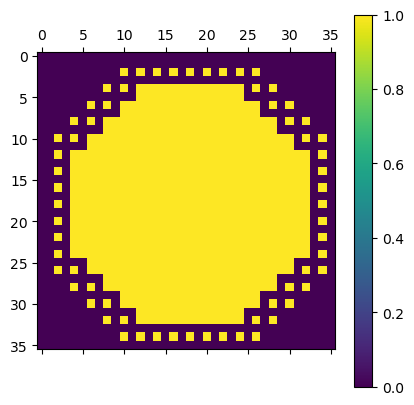

In [18]:
ax = plt.matshow(newMatrix)


plt.colorbar(ax.colorbar)

In [22]:
np.max((loc[:, 3] + 135) / 7.5)

36.0